In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
######################## exploratory analyis analysis ##################################

#the dataset is a commercila flight data set from new york
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_csv("flights.csv")

dispersion_metrics = df.describe().T

dispersion_metrics["range"] = dispersion_metrics["max"] - dispersion_metrics["min"]
dispersion_metrics["IQR"] = dispersion_metrics["75%"] - dispersion_metrics["25%"]

# dispersion metrics
print(dispersion_metrics[[ "min", "max", "range", ]])


column = df['distance']

# basics
variance = column.var()

std_dev = column.std()

data_range = column.max() - column.min()

iqr = column.quantile(0.75) - column.quantile(0.25)


print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Range: {data_range}")
print(f"IQR: {iqr}")



print("Number of objects:", len(df))

#null  count

print("Null objects for each collumn")
print(df.isnull().sum())


df[df['arr_time'].isnull()].to_csv('rows_with_nulls.csv', index=False)

#types

#------continious------
#year
#dep_time
#sched_dep_time
#dep_delay
#arr_time
#sched_arr_time
#arr_delay
#air_time
#distance
#hour
#minute
#time_hour


#categorical
#id
#month
#day
#carrier
#flight
#tailnum
#origin
#dest
#name

                   min       max     range
id                 0.0  336775.0  336775.0
year            2013.0    2013.0       0.0
month              1.0      12.0      11.0
day                1.0      31.0      30.0
dep_time           1.0    2400.0    2399.0
sched_dep_time   106.0    2359.0    2253.0
dep_delay        -43.0    1301.0    1344.0
arr_time           1.0    2400.0    2399.0
sched_arr_time     1.0    2359.0    2358.0
arr_delay        -86.0    1272.0    1358.0
flight             1.0    8500.0    8499.0
air_time          20.0     695.0     675.0
distance          17.0    4983.0    4966.0
hour               1.0      23.0      22.0
minute             0.0      59.0      59.0
Variance: 537630.6811568184
Standard Deviation: 733.2330333235255
Range: 4966
IQR: 887.0
Number of objects: 336776
Null objects for each collumn
id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_ti

In [ ]:
######################## new feature creation ##################################

# calculates the "speed" and the arrival delay disreagarding the departure delay
df['miles_per_minute'] = df['distance']/ df['air_time']
df['pure_arrival_delay'] = df['arr_delay']-df['dep_delay']


print(df['miles_per_minute'].describe())
print(df['pure_arrival_delay'].describe())

count    327346.000000
mean          6.571228
std           1.010550
min           1.280000
25%           5.968153
50%           6.735849
75%           7.313725
max          11.723077
Name: miles_per_minute, dtype: float64
count    327346.000000
mean         -5.659779
std          18.043648
min        -109.000000
25%         -17.000000
50%          -7.000000
75%           3.000000
max         196.000000
Name: pure_arrival_delay, dtype: float64


Text(24.765624999999993, 0.5, 'Air Time (minutes)')

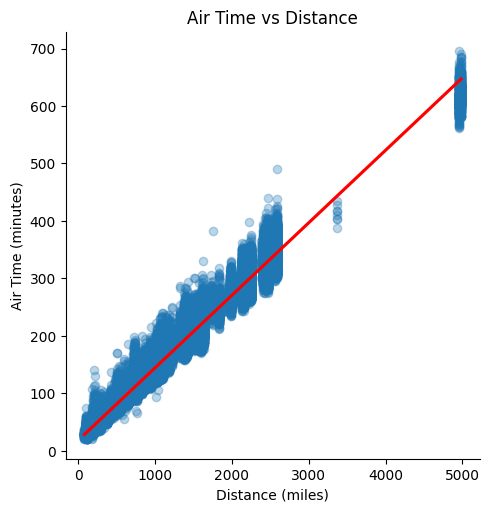

In [ ]:
########################  scatter plot ##################################

sns.lmplot(data=df, x='distance', y='air_time', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Air Time vs Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')

In [ ]:
######################## not needead ##################################
#year is not needed because it is basically a constant 2013
df.drop('year', axis=1, inplace=True)

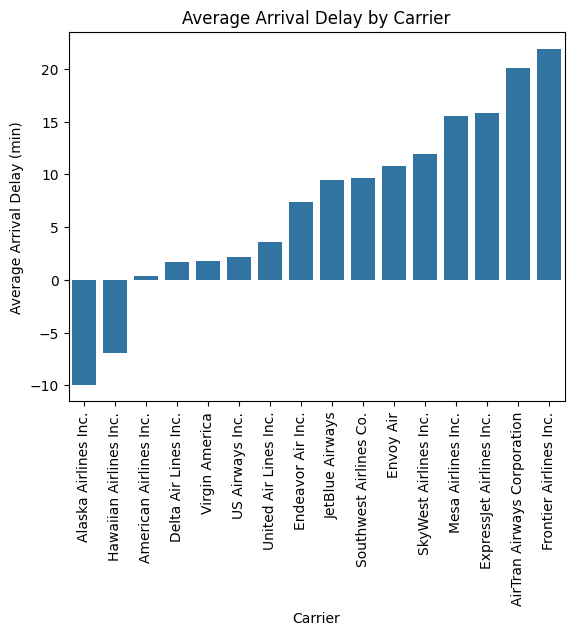

In [ ]:
######################## viz ##################################

#show which airlines have what average delays, some see improvement wow!
avg_delay = df.groupby('name')['arr_delay'].mean().sort_values()
sns.barplot(x=avg_delay.index, y=avg_delay.values)
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Arrival Delay (min)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
######################## filter outliers ##################################


#shows outliers we, leave them in because its interesting too see which airlines have these outliers
numeric_cols = ['arr_delay', 'dep_delay']
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

outliers = (z_scores > 3).any(axis=1)

df_outliers = df[outliers]
df_clean = df[~outliers]

print(df_outliers)


#outlier counts for airlines
outliers_per_airline = df_outliers.groupby('name').size().reset_index(name='outlier_count')

outliers_per_airline = outliers_per_airline.sort_values(by='outlier_count', ascending=False)

print(outliers_per_airline)

            id  year  month  day  dep_time  sched_dep_time  dep_delay  \
151        151  2013      1    1     848.0            1835      853.0   
218        218  2013      1    1     957.0             733      144.0   
268        268  2013      1    1    1114.0             900      134.0   
649        649  2013      1    1    1815.0            1325      290.0   
673        673  2013      1    1    1842.0            1422      260.0   
...        ...   ...    ...  ...       ...             ...        ...   
336579  336579  2013      9   30    1823.0            1545      158.0   
336668  336668  2013      9   30    1951.0            1649      182.0   
336724  336724  2013      9   30    2053.0            1815      158.0   
336757  336757  2013      9   30    2159.0            1845      194.0   
336763  336763  2013      9   30    2235.0            2001      154.0   

        arr_time  sched_arr_time  arr_delay  ... origin  dest air_time  \
151       1001.0            1950      851.0  ... 

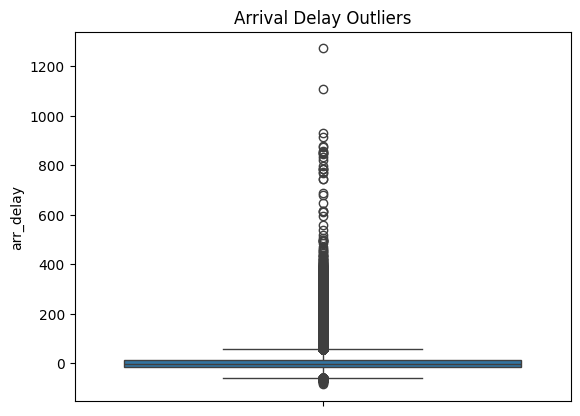

In [ ]:
######################## outlier viz ##################################

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df['arr_delay'])
plt.title('Arrival Delay Outliers')
plt.show()

Correlation Matrix:
            dep_delay  arr_delay  air_time  distance
dep_delay   1.000000   0.914803 -0.022405 -0.021681
arr_delay   0.914803   1.000000 -0.035297 -0.061868
air_time   -0.022405  -0.035297  1.000000  0.990650
distance   -0.021681  -0.061868  0.990650  1.000000

Covariance Matrix:
              dep_delay    arr_delay      air_time       distance
dep_delay  1605.259322  1635.908402    -84.101639    -639.254548
arr_delay  1635.908402  1992.130727   -147.598916   -2032.109540
air_time    -84.101639  -147.598916   8777.498430   68301.352289
distance   -639.254548 -2032.109540  68301.352289  541561.354423


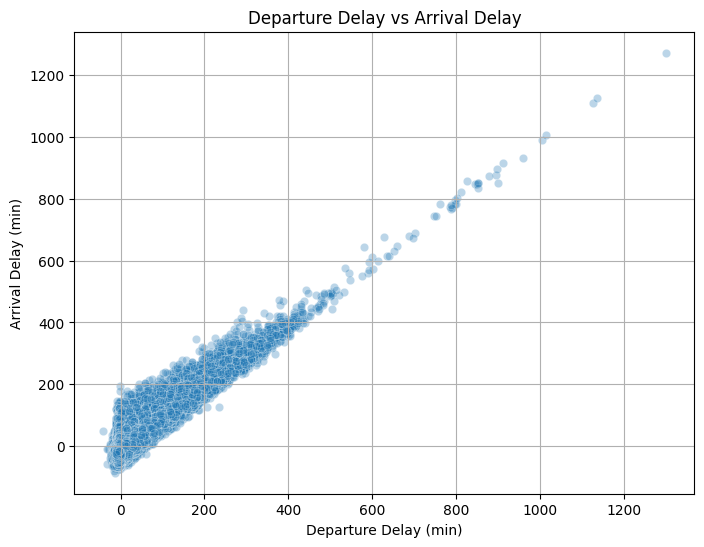

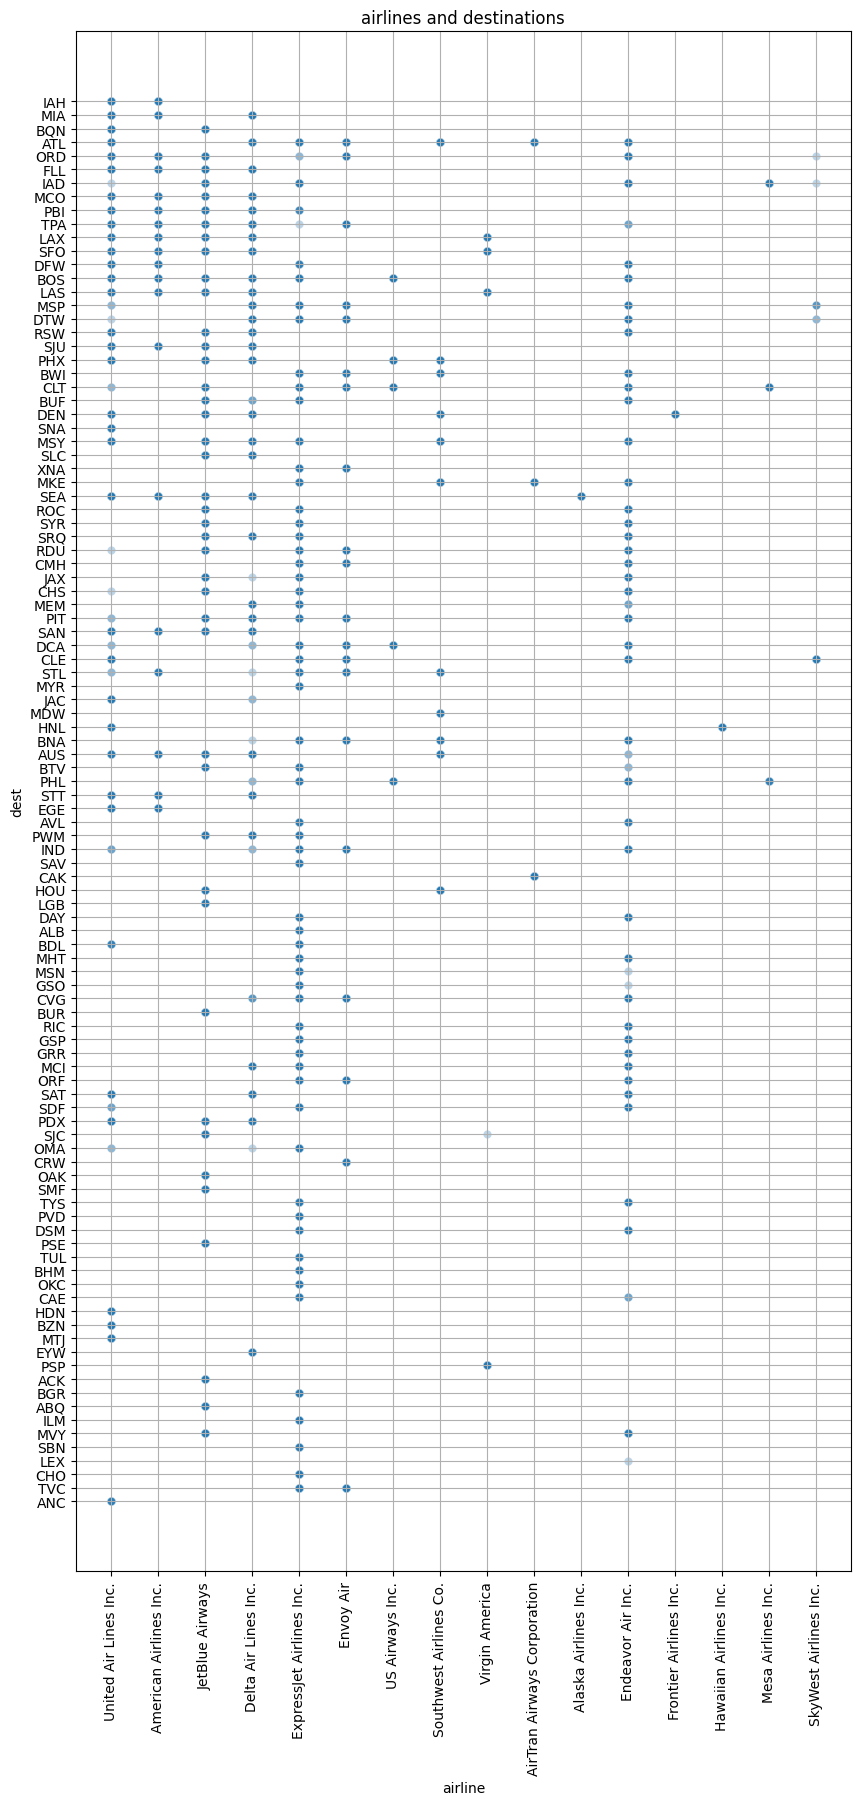

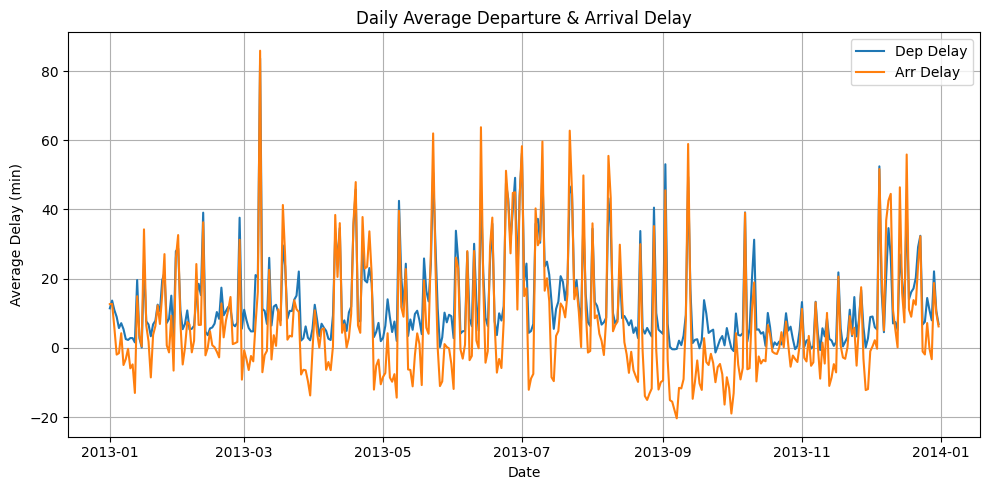

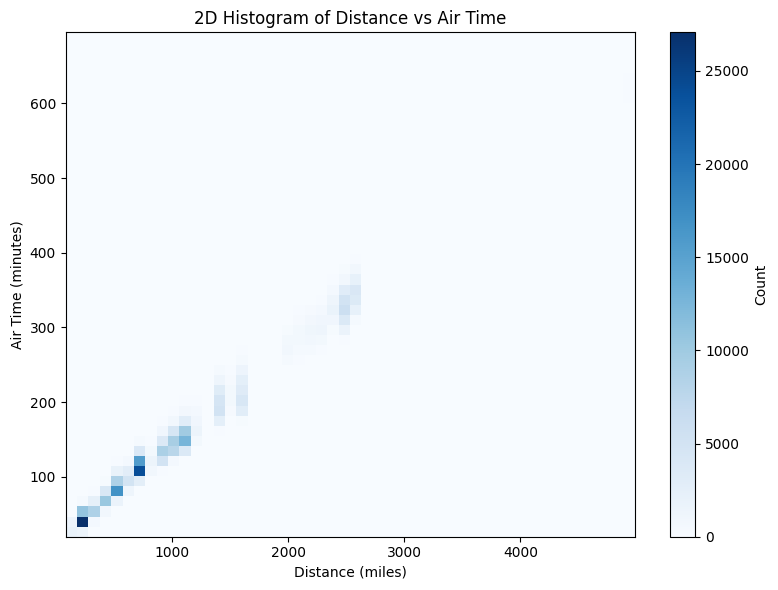

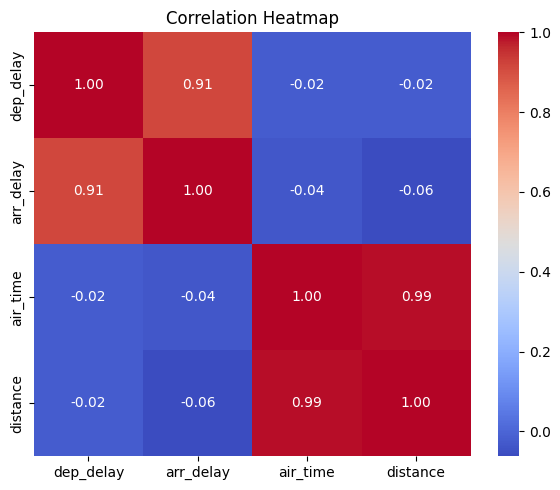

In [ ]:
######################## some more vizaulizations ##################################

df_clean = df.dropna(subset=[
    'dep_delay', 'arr_delay', 'air_time', 'distance', 'sched_dep_time', 'sched_arr_time'
])

# cor
correlation_matrix = df_clean[['dep_delay', 'arr_delay', 'air_time', 'distance']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# cov
covariance_matrix = df_clean[['dep_delay', 'arr_delay', 'air_time', 'distance']].cov()
print("\nCovariance Matrix:\n", covariance_matrix)

########### VISUALIZATIONS ##########

#  scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='dep_delay', y='arr_delay', alpha=0.3)
plt.title("Departure Delay vs Arrival Delay")
plt.xlabel("Departure Delay (min)")
plt.ylabel("Arrival Delay (min)")
plt.grid(True)
plt.show()



#  scatter plot
plt.figure(figsize=(10, 20))
sns.scatterplot(data=df_clean, x='name', y='dest', alpha=0.3)
plt.title("airlines and destinations")
plt.xlabel("airline")
plt.ylabel("dest")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# line
daily_avg_delay = df_clean.groupby([ 'year', 'month', 'day'])[['dep_delay', 'arr_delay']].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(daily_avg_delay[['year', 'month', 'day']]), daily_avg_delay['dep_delay'], label='Dep Delay')
plt.plot(pd.to_datetime(daily_avg_delay[['year', 'month', 'day']]), daily_avg_delay['arr_delay'], label='Arr Delay')
plt.title("Daily Average Departure & Arrival Delay")
plt.xlabel("Date")
plt.ylabel("Average Delay (min)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# dist vs time
plt.figure(figsize=(8, 6))
plt.hist2d(df_clean['distance'], df_clean['air_time'], bins=(50, 50), cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.title('2D Histogram of Distance vs Air Time')
plt.tight_layout()
plt.show()

 # cor matrxi
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()